In [1]:
import pandas as pd
from sklearn import metrics

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
import numpy as np

# Define Needed Functions

In [2]:
def label_predictions(predictions_raw, key):
    """Apply the original labels to our predictions to compute interpretable metrics"""
    
    transformed = predictions_raw.merge(key, how='inner', left_on='predicted', right_on='tag') \
      .drop(columns=['predicted', 'tag']) \
      .rename(columns={'name': 'category_predicted'}) \
      .merge(key, how='inner', left_on='target', right_on='tag') \
      .drop(columns=['target', 'tag']) \
      .rename(columns={'name': 'name_target'})
    
    return transformed

In [37]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,
                         fig_path=None):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots(figsize=(20,20))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    ax.tick_params(axis='both', which='major', labelsize=25)
    ax.tick_params(axis='both', which='minor', labelsize=25)
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    
    if fig_path:
        plt.savefig('{}.png'.format(fig_path))
        
    return ax

# Analysis of Metrics

## Genre

In [25]:
key = pd.read_csv('../data/label_keys/genre_dict_df.tsv', delimiter='\t', usecols=[0,1],
                 names=['name', 'tag'], dtype=str)
preds_raw = pd.read_csv('../results/bert_genre/predictions_genre.txt', index_col=0,
                             dtype=str)

In [26]:
preds_labeled = label_predictions(preds_raw, key)

In [27]:
genre_preds, genre_target = preds_labeled.category_predicted.values, preds_labeled.name_target.values

In [32]:
print(metrics.classification_report(genre_target, genre_preds, digits=5))

              precision    recall  f1-score   support

     Country    0.55701   0.56202   0.55950      1443
  Electronic    0.34874   0.09629   0.15091       862
        Folk    0.40476   0.08374   0.13878       203
     Hip-Hop    0.74673   0.80305   0.77387      2559
       Indie    0.50000   0.00233   0.00463       430
        Jazz    0.55026   0.26196   0.35495       794
       Metal    0.74443   0.62845   0.68154      2285
         Pop    0.52540   0.38256   0.44275      3487
         R&B    0.75862   0.05366   0.10023       410
        Rock    0.63869   0.83102   0.72227     10321

    accuracy                        0.63806     22794
   macro avg    0.57746   0.37051   0.39294     22794
weighted avg    0.62233   0.63806   0.60659     22794



In [29]:
f1 = metrics.f1_score(genre_target, genre_preds, average='micro', pos_label=None)
recall = metrics.recall_score(genre_target, genre_preds, average='micro', pos_label=None)

In [30]:
classes = ['Country', 'Electronic', 'Folk', 'Hip-Hop', 'Indie',
          'Jazz', 'Metal', 'Pop', 'R&B', 'Rock']

Normalized confusion matrix
[[5.62023562e-01 6.93000693e-04 6.93000693e-04 7.62300762e-03
  0.00000000e+00 1.31670132e-02 0.00000000e+00 5.19750520e-02
  0.00000000e+00 3.63825364e-01]
 [9.28074246e-03 9.62877030e-02 2.32018561e-03 1.32250580e-01
  0.00000000e+00 8.12064965e-03 4.17633411e-02 1.42691415e-01
  0.00000000e+00 5.67285383e-01]
 [8.37438424e-02 9.85221675e-03 8.37438424e-02 9.85221675e-03
  4.92610837e-03 4.92610837e-03 3.44827586e-02 8.86699507e-02
  0.00000000e+00 6.79802956e-01]
 [3.51699883e-03 8.98788589e-03 0.00000000e+00 8.03048066e-01
  0.00000000e+00 7.81555295e-04 8.59710825e-03 7.19030871e-02
  0.00000000e+00 1.03165299e-01]
 [9.30232558e-03 4.65116279e-03 0.00000000e+00 3.72093023e-02
  2.32558140e-03 0.00000000e+00 2.32558140e-02 6.04651163e-02
  0.00000000e+00 8.62790698e-01]
 [7.80856423e-02 5.03778338e-03 1.25944584e-03 6.80100756e-02
  0.00000000e+00 2.61964736e-01 7.55667506e-03 1.20906801e-01
  1.25944584e-03 4.55919395e-01]
 [0.00000000e+00 7.00218818e-0

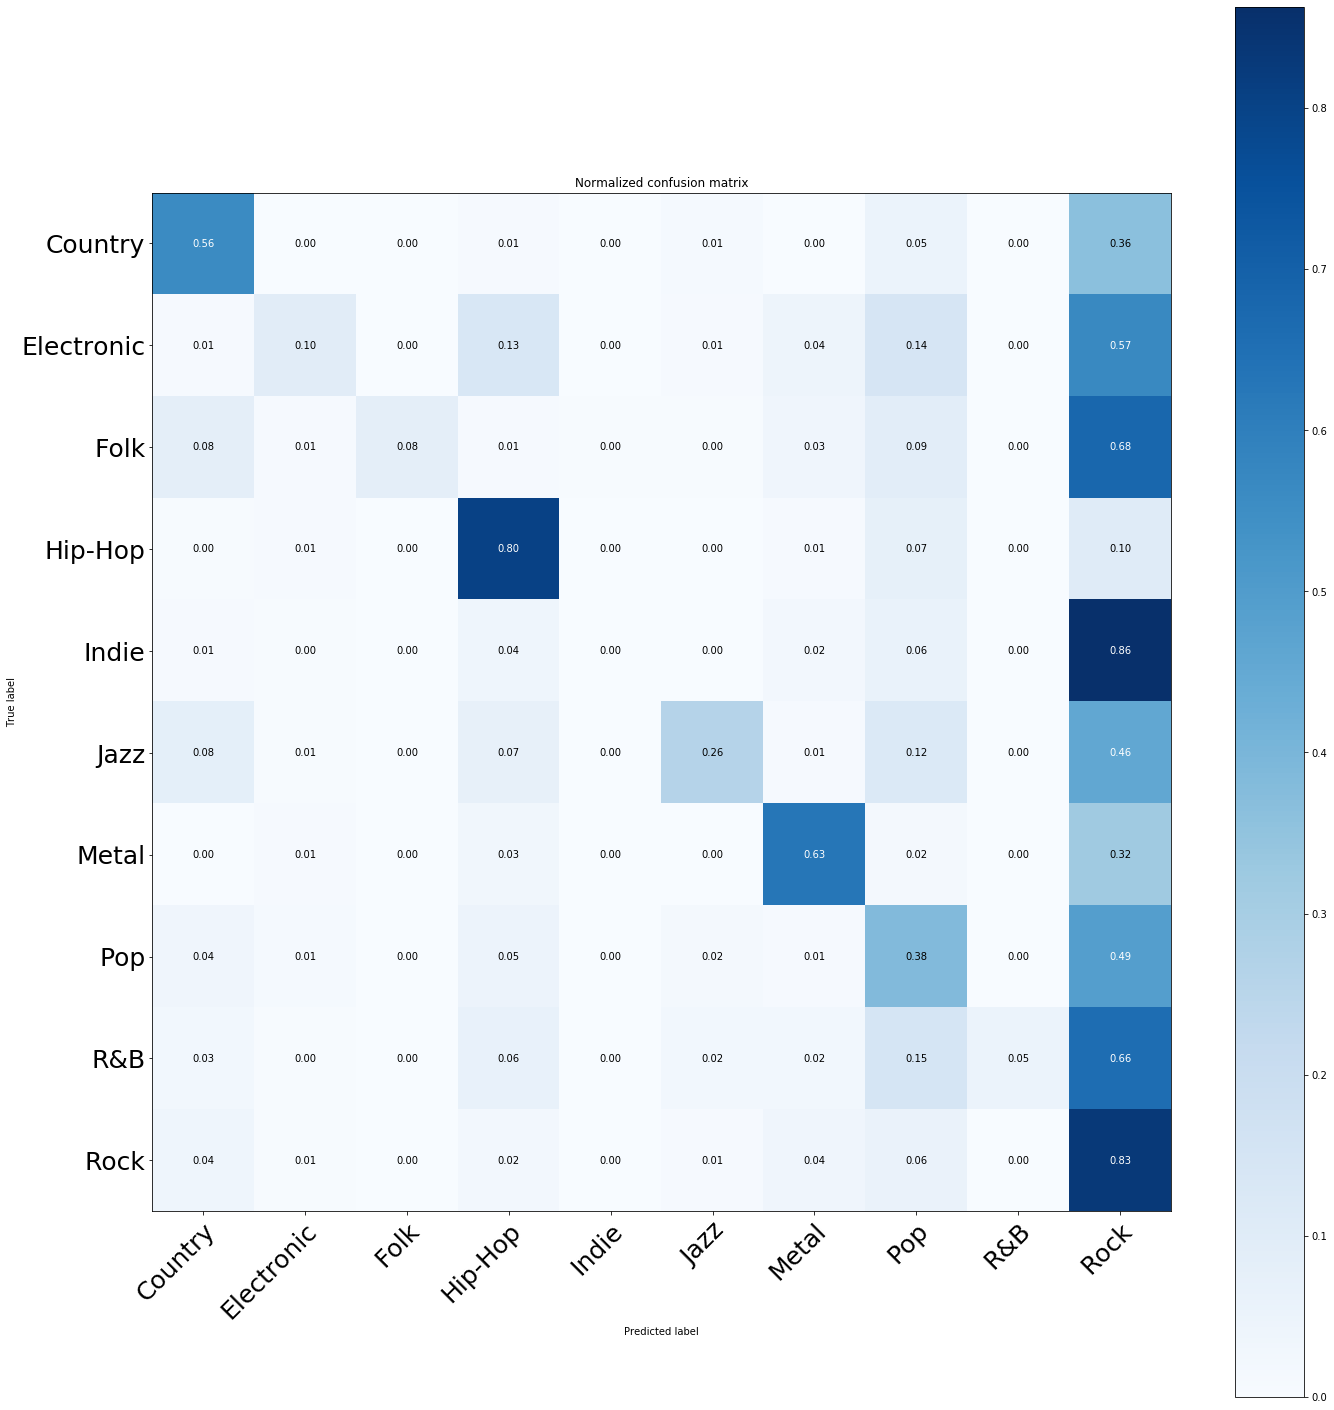

In [39]:
plot_confusion_matrix(genre_target, genre_preds, classes=classes, normalize=True,
                      fig_path="../results/figures/confusion_genre")

## Artist

In [18]:
key = pd.read_csv('../data/label_keys/artist_dict_df.tsv', delimiter='\t', usecols=[0,1],
                 names=['name', 'tag'], dtype=str)
preds_raw = pd.read_csv('../results/bert_artist/predictions_artist.txt', index_col=0,
                             dtype=str)

# truncate artists to only 25 characters
key = key.iloc[:25]
key['tag'] = key['tag'].map(lambda x: x[:25])

In [19]:
preds_labeled = label_predictions(preds_raw, key)

In [20]:
artist_preds, artist_target = preds_labeled.category_predicted.values, preds_labeled.name_target.values

In [21]:
print(metrics.classification_report(artist_target, artist_preds, digits=3))

                      precision    recall  f1-score   support

             50-cent      0.707     0.763     0.734        38
            ace-hood      0.346     0.200     0.254        45
           amy-grant      0.500     0.480     0.490        50
       barry-manilow      0.533     0.356     0.427        45
       bill-anderson      0.413     0.456     0.433        57
            bon-jovi      0.939     0.775     0.849        40
bone-thugs-n-harmony      0.793     0.489     0.605        47
   bruce-springsteen      0.419     0.591     0.491        44
         carly-simon      0.438     0.451     0.444        71
         carole-king      0.841     0.698     0.763        53
         chumbawamba      0.475     0.380     0.422        50
       conway-twitty      0.306     0.422     0.355        45
                e-40      0.571     0.526     0.548        38
         eddy-arnold      0.500     0.341     0.406        41
       elvis-presley      0.619     0.565     0.591        46
      e

In [23]:
artist_classes = sorted(preds_labeled.name_target.unique().tolist())

Normalized confusion matrix
[[0.76315789 0.         0.         0.         0.         0.
  0.         0.         0.         0.02631579 0.         0.
  0.         0.         0.         0.         0.07894737 0.
  0.         0.02631579 0.10526316 0.         0.         0.
  0.        ]
 [0.         0.2        0.08888889 0.02222222 0.08888889 0.
  0.         0.         0.04444444 0.         0.15555556 0.08888889
  0.         0.02222222 0.02222222 0.02222222 0.         0.06666667
  0.04444444 0.         0.04444444 0.         0.         0.08888889
  0.        ]
 [0.02       0.         0.48       0.         0.         0.02
  0.         0.         0.         0.         0.02       0.08
  0.         0.         0.02       0.2        0.         0.
  0.02       0.         0.08       0.02       0.02       0.02
  0.        ]
 [0.         0.02222222 0.         0.35555556 0.         0.
  0.         0.02222222 0.         0.02222222 0.02222222 0.
  0.04444444 0.02222222 0.04444444 0.04444444 0.         0.1

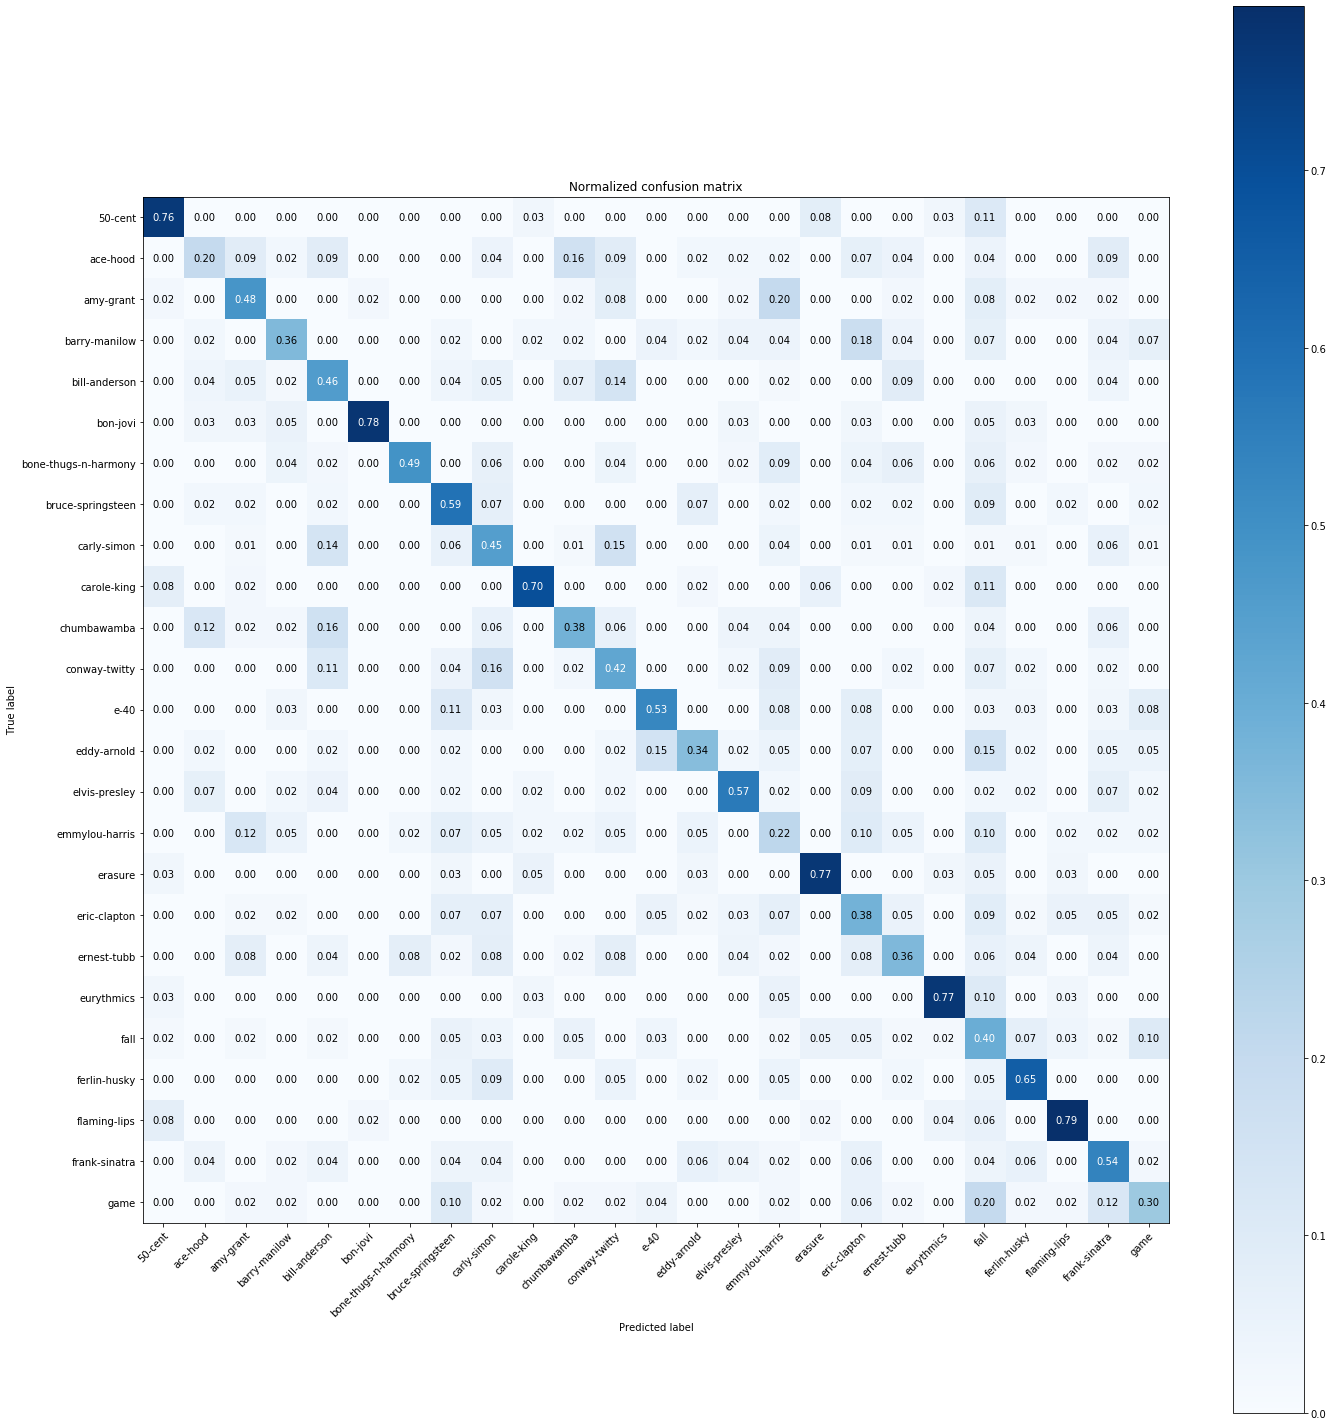

In [24]:
plot_confusion_matrix(artist_target, artist_preds, classes=artist_classes, normalize=True,
                     fig_path="../results/figures/confusion_artist.png")